In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install wikipedia
! pip install nltk
! pip install rake-nltk

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=817db0f15ef7757f732458404422d2721d9fc7d3aa8ff315c7cf801b9ef3b166
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7829 sha256=34c63b5ec22cdf648193dcc3dbca43e080f37b06195b9bbc343009f308f99bd4
  Stored in directory: /root/.cache/pip/wheels/7c/d9/8a/b8a9244fa89a07f288f9fe006aafc79d93fceb58496c29b606
Successfully built rake-nltk


In [ ]:
! pip install transformers

     |████████████████████████████████| 2.6 MB 16.1 MB/s 
     |████████████████████████████████| 3.3 MB 54.9 MB/s 
     |████████████████████████████████| 636 kB 75.6 MB/s 
     |████████████████████████████████| 895 kB 60.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import wikipedia
import random
import tqdm
import nltk
import re
import string
import threading
import multiprocessing
import os
import shutil
from nltk.corpus import stopwords
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from tqdm import tqdm

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/aiijc_sber/data_bert_10_sep.csv', sep = ';')

In [ ]:
help_list = []
for i in data.iterrows():
  # print(i[1])
  data_str = i[1][3]
  data_try = data_str.replace('\n', '')[1:-1].split(' ')
  data_try_2 = []
  for j in data_try:
    if len(j):
      data_try_2.append(float(j))
  dd = [i[1][2]] + data_try_2
  help_list.append(dd)
  


In [ ]:
columns = ['y']+['param_'+str(i) for i in range(768)]
data_help = pd.DataFrame(help_list, columns=columns)

In [ ]:
data_help.head()

,y,param_0,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,param_9,param_10,param_11,param_12,param_13,param_14,param_15,param_16,param_17,param_18,param_19,param_20,param_21,param_22,param_23,param_24,param_25,param_26,param_27,param_28,param_29,param_30,param_31,param_32,param_33,param_34,param_35,param_36,param_37,param_38,...,param_728,param_729,param_730,param_731,param_732,param_733,param_734,param_735,param_736,param_737,param_738,param_739,param_740,param_741,param_742,param_743,param_744,param_745,param_746,param_747,param_748,param_749,param_750,param_751,param_752,param_753,param_754,param_755,param_756,param_757,param_758,param_759,param_760,param_761,param_762,param_763,param_764,param_765,param_766,param_767
0,1,-0.111608,-0.139411,0.292586,-0.148297,0.026566,0.191411,-0.214789,-0.237209,-0.000438,0.023530,0.150928,-0.107223,-0.170432,0.018468,-0.533326,-0.247004,-0.155606,-0.068871,-0.121570,-0.026033,0.186858,-0.060623,-0.209298,0.178101,-0.105603,-0.151436,0.105535,0.081056,0.056535,0.076316,0.021150,-0.172519,0.102789,0.063449,0.025386,0.023942,-2.070966,0.143458,-0.086921,...,-0.163824,-0.141285,0.085095,-0.310400,0.098215,-0.014573,0.062841,0.212783,-0.397905,-0.215540,0.337335,-0.097829,0.240628,0.024843,-0.059798,-0.115089,0.149283,-0.137274,-0.206303,-0.004126,0.013667,-0.022362,0.155409,-0.006021,0.146620,-0.122333,0.043194,0.244110,0.132042,-0.135366,0.180382,-0.054403,-0.165745,-0.364170,-0.032433,-0.077634,0.106607,-0.178522,0.054828,-0.126188
1,1,-0.027796,-0.061375,0.150224,-0.156206,-0.103828,0.088725,-0.112992,-0.221410,0.065013,-0.151731,0.072506,-0.030547,-0.079210,-0.040898,-0.616811,-0.242902,-0.101240,-0.254277,0.004934,-0.173242,0.188254,0.062403,-0.147117,0.104474,-0.323012,-0.156088,0.111599,-0.004687,0.068477,0.209092,-0.073974,-0.132433,0.087721,0.069404,0.056344,0.017163,-2.041433,0.031612,-0.157283,...,-0.107965,-0.078467,0.075037,-0.426386,0.118805,-0.201014,0.058601,-0.045007,-0.391663,0.078675,0.297833,-0.112004,-0.009788,0.157820,-0.031682,-0.124734,0.104799,-0.179359,0.008461,-0.053269,0.137164,-0.263926,0.125339,-0.023533,0.192868,-0.008229,0.169375,0.079486,0.160083,-0.291370,0.155279,-0.318668,-0.207050,-0.272403,-0.080389,0.043523,0.026992,-0.053478,0.192034,-0.099530
2,1,0.072250,-0.164094,0.706307,-0.184607,-0.427455,0.070351,0.175097,-0.326002,-0.010808,0.166549,0.133728,-0.072658,0.083172,-0.139814,-0.806688,-0.186719,-0.213986,-0.296025,0.128586,0.226514,0.360036,-0.134357,-0.039390,0.303345,-0.226933,-0.523095,0.159229,-0.024559,0.086403,0.288228,0.101634,-0.011977,0.369043,-0.179381,0.014252,-0.298339,-2.042114,0.226796,-0.124150,...,-0.090158,-0.406081,0.277029,-0.406798,0.029640,-0.300246,0.056459,-0.004351,-0.453698,0.074337,0.227848,-0.024645,-0.102156,0.154213,-0.171053,-0.042499,0.226011,-0.250719,-0.258933,0.028021,0.081127,0.135614,0.346085,-0.371343,0.164961,-0.125259,0.140404,0.062006,-0.136079,-0.414796,0.397333,-0.191491,-0.480998,-0.191682,-0.107533,0.127361,-0.062041,0.085165,0.097583,-0.330170
3,1,-0.044450,-0.200978,0.361780,-0.337794,-0.161513,0.079855,0.003078,-0.285290,0.030145,0.032314,0.036838,-0.162020,0.186779,-0.127111,-0.685326,-0.336820,-0.085295,-0.192737,0.215627,0.099191,0.342282,-0.057998,-0.054779,0.468684,-0.301302,-0.403727,0.291327,-0.039397,0.047690,0.111000,-0.031745,0.056156,0.052631,0.172188,0.126959,-0.090966,-1.896355,0.214777,-0.075971,...,-0.105294,-0.469976,0.073530,-0.681084,0.022691,-0.464399,-0.125083,0.066167,-0.478886,0.132289,0.199179,-0.200755,-0.060519,-0.029163,-0.175697,-0.061938,0.228584,-0.229445,-0.152440,-0.026495,0.067197,-0.228766,0.186262,-0.223975,0.340078,-0.109965,0.100590,0.146105,0.107711,-0.463590,0.418613,-0.329983,-0.443931,-0.463181,-0.006992,0.106491,-0.062797,0.055387,0.135986,-0.286073
4,1,-0.228922,0.004395,0.240788,0.021136,0.010435,-0.018591,-0.188958,-0.317671,-0.015507,0.194946,0.112792,-0.113525,-0.115084,0.063299,-0.400473,-0.233708,-0.027050,0.112706,-0.021704,-0.075161,0.25

In [ ]:
data_help.corr()['y'].sort_values(ascending=False)

y            1.000000
param_362    0.274785
param_164    0.234595
param_618    0.220826
param_121    0.213413
               ...   
param_507   -0.185197
param_625   -0.186557
param_538   -0.191374
param_249   -0.196031
param_710   -0.199228
Name: y, Length: 769, dtype: float64

In [ ]:
data.columns

Index(['Unnamed: 0', 'text', 'y', 'features'], dtype='object')

In [ ]:
targets = np.array([target-1 for target in data.y])

In [ ]:
features_improved = []
for data_str in data.features:
  data_try = data_str.replace('\n', '')[1:-1].split(' ')
  data_try_2 = []
  for i in data_try:
    if len(i):
      data_try_2.append(float(i))
  features_improved.append(data_try_2)

In [ ]:
featnp = np.array(features_improved)
featnp.shape

(16869, 768)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(torch.Tensor(featnp), torch.Tensor(targets), test_size = 0.1, shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

torch.Size([15182, 768]) torch.Size([15182])
torch.Size([1687, 768]) torch.Size([1687])


In [ ]:
train_dataset = TensorDataset(X_train, Y_train)
test_dataset = TensorDataset(X_test, Y_test)

BATCH_SIZE = 64
train_dl = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
X_train[:5]

tensor([[ 0.0575, -0.2363, -0.1496,  ...,  0.1938, -0.0328, -0.0971],
        [ 0.3172, -0.0166,  0.3348,  ..., -0.2208, -0.1023, -0.4815],
        [-0.1531, -0.0525,  0.1789,  ..., -0.1668,  0.1033, -0.3485],
        [ 0.0514, -0.1432,  0.0565,  ...,  0.0891,  0.1269, -0.2697],
        [ 0.3099,  0.4211, -0.0731,  ..., -0.4072, -0.0997,  0.4131]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)

In [ ]:
clf.score(X_test, Y_test)

0.5204505038529935

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn
from torch.nn import functional as F
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm

In [ ]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, val_history, marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

def train(model, criterion, optimizer, train_dataloader, test_dataloader, NUM_EPOCH=15):
    train_loss_log = []
    val_loss_log = []
    
    train_acc_log = []
    val_acc_log = []
    
    for epoch in tqdm(range(NUM_EPOCH)):
        model.train()
        train_loss = 0.
        train_size = 0
        
        train_pred = 0.

        for imgs, labels in train_dataloader:
            optimizer.zero_grad()

            y_pred = model.forward(imgs)

            loss = criterion(y_pred, labels.long())
            loss.backward()
            
            train_loss += loss.item()
            train_size += y_pred.size(0)
            train_loss_log.append(loss.data / y_pred.size(0))
            
            train_pred += (y_pred.argmax(1) == labels).sum()

            optimizer.step()
        
        train_acc_log.append(train_pred / train_size)

        val_loss = 0.
        val_size = 0
        
        val_pred = 0.
        
        model.eval()
        
        with torch.no_grad():
            for imgs, labels in test_dataloader:
                
                
                pred = model.forward(imgs)
                loss = criterion(pred, labels.long())
                
                val_loss += loss.item()
                val_size += pred.size(0)
                
                val_pred += (pred.argmax(1) == labels).sum()

        val_loss_log.append(val_loss / val_size)
        val_acc_log.append(val_pred / val_size)

        clear_output()
        plot_history(train_loss_log, val_loss_log, 'loss')

        print('Train loss:', (train_loss / train_size)*100)
        print('Val loss:', (val_loss / val_size)*100)
        print('Train acc:', (train_pred / train_size)*100)
        print('Val acc:', (val_pred / val_size)*100)
        
    return train_loss_log, train_acc_log, val_loss_log, val_acc_log

In [ ]:
model = nn.Sequential(
    nn.Linear(768, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),

    nn.Linear(1024, 2048),
    nn.Dropout(),
    nn.ReLU(),

    nn.Linear(2048, 1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),

    nn.Linear(1024, 4)
)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
print(device)

cpu


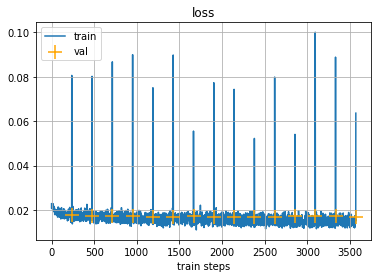

100%|██████████| 15/15 [02:33<00:00, 10.21s/it]

Train loss: 1.4959023040739574
Val loss: 1.6702239938791361
Train acc: tensor(54.4724)
Val acc: tensor(49.8518)


In [ ]:
train_loss_log, train_acc_log, val_loss_log, val_acc_log = train(model, 
                                                                 criterion, 
                                                                 optimizer, 
                                                                 train_dl, 
                                                                 test_dl)

In [ ]:
model = nn.Sequential(
                       nn.Linear(768, 256),
                       nn.ReLU(),
                       nn.Linear(256, 4)
)

In [ ]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [ ]:
class_count = [list(data.y).count(i+1) for i in range(4)]
print(class_count)
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

[4207, 4237, 4136, 4289]
tensor([0.0002, 0.0002, 0.0002, 0.0002])


In [ ]:
# model = MulticlassClassification(num_feature = 768, num_class=4)
model.to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum = 0.9)
criterion = nn.CrossEntropyLoss()
print(model)


Sequential(
  (0): Linear(in_features=768, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=4, bias=True)
)


In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X_train[:5000])

In [ ]:
xs, ys = [], []
for xxx, yyy in X_embedded:
  xs.append(xxx)
  ys.append(yyy)

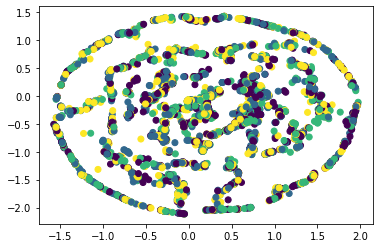

In [ ]:
plt.scatter(xs, ys, c=Y_train[:5000])

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
testDf = pd.read_csv('/content/drive/MyDrive/aiijc_sber/test.csv')

In [ ]:
testDf.head(5)

,id,task
0,0,Вопрос 1 Денис готовится провести соревнования...
1,1,Реши задачу.\nСколько коробок корма для собак ...
2,2,"Если групп элементов несколько, то применяется..."
3,3,Вопрос1 ...
4,4,Для наглядной геометрической иллюстрации объём...


In [ ]:
Xtest = tokenizer.texts_to_sequences(map(lambda x: str(x['task']), testDf.iloc))
Xtest = pad_sequences(Xtest, maxlen=sentMaxLen)

In [ ]:
predictions = model.predict(Xtest)
predictions

array([[0.05298402, 0.5866494 , 0.22541152, 0.13495508],
       [0.02405234, 0.8612694 , 0.07303725, 0.04164104],
       [0.07443149, 0.27244335, 0.52692974, 0.12619546],
       ...,
       [0.02555496, 0.8334557 , 0.07907335, 0.06191602],
       [0.07443387, 0.6249237 , 0.19366634, 0.10697617],
       [0.05720105, 0.73691344, 0.12170562, 0.08417981]], dtype=float32)

In [ ]:
predictions = list(map(lambda x: categories[int(x)], np.argmax(predictions, axis=-1)))
predictions[:5]

['музыка', 'музыка', 'спорт', 'музыка', 'музыка']

In [ ]:
from rake_nltk import Rake

def getKeyWords(textSeries: pd.Series, threshold=4, minLen=1, maxLen=2):
    r = Rake(
        stopwords=stopWordsRu,
        punctuations=punctuation,
        min_length=1, max_length=2
    )
    results = []
    for i in range(textSeries.shape[0]):
      r.extract_keywords_from_text(testDf['task'].iloc[i])
      rowResult = r.get_ranked_phrases_with_scores()
      selected = 1
      while selected < len(rowResult):
        if rowResult[selected][0] < threshold:
          break
        selected += 1
      results.append(rowResult[:selected])
    return list(map(lambda task: list(map(lambda keyword: keyword[1], task)), results))

In [ ]:
keyWords = getKeyWords(testDf['task'])

In [ ]:
keyWordsReady = list(map( lambda x: ";".join(x), keyWords))

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/aiijc_sber/sample_submission.csv')


In [ ]:
sample['keywords'] = keyWordsReady

In [ ]:
sample['category'] = predictions

In [ ]:
sample.to_csv('submit.csv', index=False)

In [ ]:
sample['category'].value_counts()

музыка        434
спорт          56
литература     22
животные        2
Name: category, dtype: int64

In [ ]:
sample

,id,category,keywords
0,0,музыка,настольному хоккею;вариантов выбора
1,1,музыка,собак поместится;реши задачу
2,2,спорт,течение года;сдавали зачет;реши задачу;равно и...
3,3,музыка,суммы затрат;продукты питания;конце месяца;дом...
4,4,музыка,этими объектами;увлекающихся футболом;либо пон...
...,...,...,...
509,509,музыка,следующие вопросы;проанализируй диаграмму
510,510,музыка,сборке тренажеров;выполнить задание;6 дней;4 д...
511,511,музыка,7 дней;1 день
512,512,музыка,ухватил пернатого;улетающую птицу;спрыгнул вни...
